# This notebook has visualizations and data processing for the UrbanSound dataset 
**Insert the dataset path to load the dataset into a csv**

**Improved notebook with access on how to get the audio data is soon to come**

In [55]:
#### Dependencies ####

#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import librosa.display

#copy this code into your notebook if all you want to do is have a df with all the paths to the audio
#this data frame has the direct path to the audio file under df['path']

urban_dataset_path = './../UrbanSound8K/' #insert the path right here

df = pd.read_csv(urban_dataset_path+'metadata/UrbanSound8K.csv')
df['path'] = '.'
for i, row in df.iterrows():
    df.at[i,'path']=urban_dataset_path+'audio/fold{}/{}'.format(row['fold'], row['slice_file_name']) 
    
    
#information on how to load the data into an ND-array will come soon

**Everthing below is to help visualize the data**

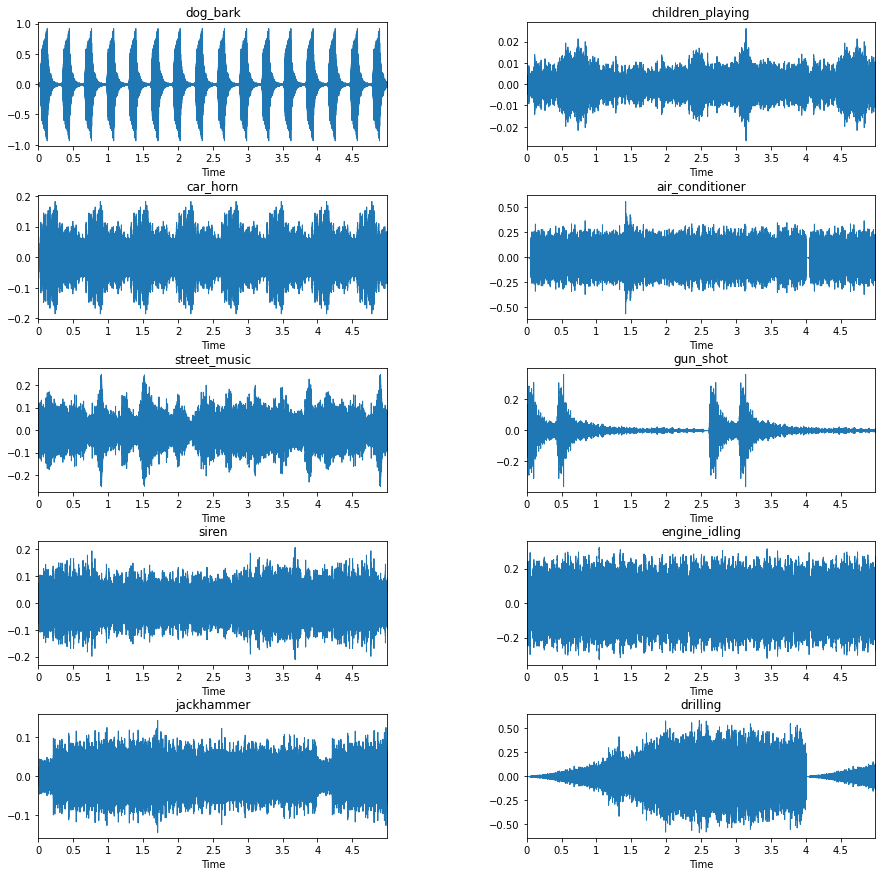

In [44]:
labels = list(df['class'].unique())
sample_rate = 8000
duration=5.0
# Let's grab a single audio file from each class and display how the spectrogram looks
files = dict()
for i in range(len(labels)):
    tmp = df[df['class'] == labels[i]][:1].reset_index()
    path = urban_dataset_path'audio/fold{}/{}'.format(tmp['fold'][0], tmp['slice_file_name'][0])
    files[labels[i]] = path
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    fn = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, _ = librosa.load(fn, sr=sample_rate, mono=True, offset=0.0, duration=duration)
    data = librosa.util.fix_length(data, int(sample_rate*duration), mode='wrap')
    librosa.display.waveplot(data, sr= sample_rate)
#plt.savefig('class_examples.png')

**These are normal Spectrograms**

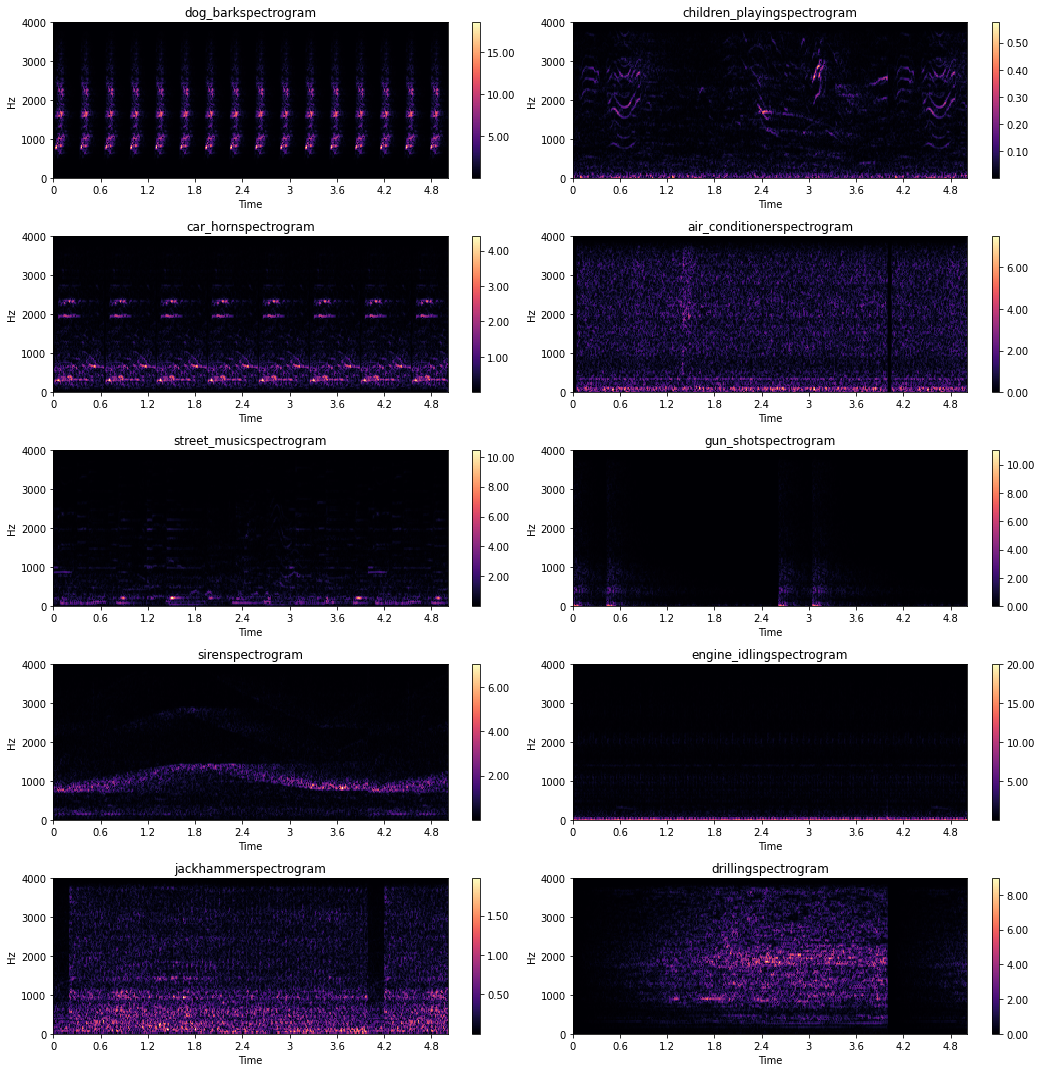

In [50]:
from common_audio import *
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    fn = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(""+label+" spectrogram")
    data, _ = librosa.load(fn, sr=sample_rate, mono=True, offset=0.0, duration=duration)
    data = librosa.util.fix_length(data, int(sample_rate*duration), mode='wrap')
    spectrogram = audio_to_spectrogram(np.array([data]), sample_rate)
    librosa.display.specshow(spectrogram[0], sr=sample_rate, hop_length=64, x_axis='time', y_axis='hz')
    plt.colorbar(format='%2.2f')    
    plt.tight_layout() 


**Data visualization for log-transform or pseudo-MFCC transforms coming ahead**